<a target="_blank" href="https://colab.research.google.com/github/sonder-art/fdd_p25/blob/main/professor/numpy/notebooks/tarea_tiempos_numpy.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


### El proyecto se entrega en un pull-request en este documento directamente, que no sea del main branch sino de un branch llamado `proyecto_python`, y el titulo de pull reques `Proyecto Python`, se entrega antes del 6 de noviembre.

# Tarea/Proyecto — Tiempos con distintas estrategias (Python vs NumPy)

Objetivo: practicar varias formas de programar en Python y comparar su rendimiento con NumPy.

Qué harás:
- Implementar 3 problemas (P1 sencillo, P2 intermedio, P3 un poco más complejo).
- Para cada problema, crear 4 versiones: for, list comprehension, generator (yield/generador), y NumPy vectorizado.
- Medir tiempos con `timeit` de forma justa y compararlos.

Reglas mínimas:
- Verifica primero que todas las versiones producen el mismo resultado lógico (mismo tamaño/forma, mismos valores o valores equivalentes).
- Sé consistente: no mezcles listas y arreglos sin aclarar el formato final esperado.
- Para medir generadores, materializa con `list(...)` en el cronómetro para compararlo con las otras estrategias.
- No copies soluciones externas; escribe tu implementación.

Referencia: `07_Vectorizacion_vs_For_vs_Comprehensions.ipynb`.



In [2]:
# Instalación rápida (si la necesitas)

import numpy as np
import timeit


## Problema 1 — Escalar un vector por una constante

Descripción: dado un arreglo 1D `a` y una constante escalar `c`, produce una salida equivalente a `a * c`.

Requisitos:
- Entrada: `a` (1D), `c` (float/int).
- Salida: misma longitud que `a`, valores escalados por `c`.
- Mantén el tipo de salida consistente entre versiones (lista vs ndarray), o documenta la diferencia.

Implementa 4 versiones:
- for loop (acumula resultados con append)
- list comprehension
- generator (yield o expresión generadora)
- NumPy vectorizado

Datos sugeridos: `a = np.arange(n, dtype=float)`, `c = 2.0`.


In [3]:
# P1 — Stubs (completa las funciones)

def p1_for(a: np.ndarray, c: float):
    escalados=[]
    for i in a:
        escalados.append(i*c)
    return escalados

def p1_comp(a: np.ndarray, c: float):
    escalados = [i*c for i in a]
    return escalados

def p1_gen(a: np.ndarray, c: float):
    for i in a:
        yield i*c


def p1_np(a: np.ndarray, c: float):
    a = a*c


In [30]:
# P1 — Harness de tiempos (ajusta n y number)

def time_p1(n=100_000, number=5):
    a = np.arange(n, dtype=float)
    c = 2.0
    return (
        timeit.timeit(lambda: p1_for(a, c), number=number),
        timeit.timeit(lambda: p1_comp(a, c), number=number),
        timeit.timeit(lambda: list(p1_gen(a, c)), number=number),
        timeit.timeit(lambda: p1_np(a, c), number=number),
    )

forp1=np.array([])
listp1=np.array([])
genp1=np.array([])
nump1=np.array([])
for i in range(5):
    resp1=time_p1()
    forp1=np.append(forp1,resp1[0])
    listp1=np.append(listp1,resp1[1])
    genp1=np.append(genp1,resp1[2])
    nump1=np.append(nump1,resp1[3])
forp1=np.median(forp1)
listp1=np.median(listp1)
genp1=np.median(genp1)
nump1=np.median(nump1)
print(forp1)
print(listp1)
print(genp1)
print(nump1)
  


0.07830397299994729
0.06992793700010225
0.0751483349999944
0.0003480559998934041


## Problema 2 — Suma de vecinos 1D (ventana)

Descripción: dado `a` (1D) y una ventana `k` impar (p. ej. 3), calcular `b[i]` como la suma de los `k` vecinos centrados en `i`.

Requisitos:
- Entrada: `a` (1D), `k` impar ≥ 3.
- Borde: puedes ignorar índices fuera de rango, recortar el resultado o replicar/extender bordes; explica tu elección.
- Salida: 1D; documenta si su longitud cambia por tu manejo de bordes.

Implementa 4 versiones: for, list comprehension, generator, NumPy vectorizado (pistas: slicing con desplazamientos, `np.roll`, o una convolución simple).

Datos sugeridos: `a = np.arange(n, dtype=float)`, `k = 3`. 


In [13]:
# P2 — Stubs (completa las funciones)

def p2_for(a: np.ndarray, k: int = 3):
    resultado=[]
    m = k//2
    for indice in range(a.size):
        lim_inf=indice-m
        vez=1
        suma=0
        while vez <= k:
            if lim_inf>=0 and lim_inf<a.size:
                suma=suma+a[lim_inf]
            lim_inf=lim_inf+1
            vez=vez+1
        resultado.append(suma)
    return resultado

def p2_comp(a: np.ndarray, k: int = 3):
    m=k//2
    return [sum(a[max(0,indice-m):min(a.size,indice+m+1)]) for indice in range(a.size)]


def p2_gen(a: np.ndarray, k: int = 3):
    m=k//2
    for i in range(a.size):
        lim_inf=max(0,i-m)
        lim_sup=min(a.size,i+m+1)
        yield sum(a[lim_inf:lim_sup])


def p2_np(a: np.ndarray, k: int = 3):
    kernel = np.ones(k,dtype=a.dtype)
    return np.convolve(a,kernel,mode='same')


In [29]:
# P2 — Harness de tiempos

def time_p2(n=100_000, number=3):
    a = np.arange(n, dtype=float)
    k = 3
    return (
        timeit.timeit(lambda: p2_for(a, k), number=number),
        timeit.timeit(lambda: p2_comp(a, k), number=number),
        timeit.timeit(lambda: list(p2_gen(a, k)), number=number),
        timeit.timeit(lambda: p2_np(a, k), number=number),
    )

forp2=np.array([])
listp2=np.array([])
genp2=np.array([])
nump2=np.array([])
for i in range(5):
    resp2=time_p2()
    forp2=np.append(forp2,resp2[0])
    listp2=np.append(listp2,resp2[1])
    genp2=np.append(genp2,resp2[2])
    nump2=np.append(nump2,resp2[3])
forp2=np.median(forp2)
listp2=np.median(listp2)
genp2=np.median(genp2)
nump2=np.median(nump2)
print(forp2)
print(listp2)
print(genp2)
print(nump2) 


0.3356340829996043
0.5647075980000409
0.5615720340001644
0.00044901700039190473


## Problema 3 — Transformación no lineal y filtrado

Descripción: dado `a` (1D float), aplica una transformación no lineal y filtra con un umbral.

Requisitos:
- Transformación propuesta (de ejemplo): `np.sin(a) + a**2`.
- Entrada: `a` (1D float), `umbral` (float).
- Salida: colección con los elementos resultantes que superan `umbral`.
- Mantén clara la diferencia entre devolver lista vs ndarray.

Implementa 4 versiones: for, list comprehension, generator, NumPy vectorizado (ufuncs + máscara booleana).

Datos sugeridos: `a = np.linspace(0, 1000, n)`, `umbral = 10.0`. 


In [7]:
# P3 — Stubs (completa las funciones)
import math

def p3_for(a: np.ndarray, umbral: float):
    resultado=[]
    for i in a:
        valor_nuevo=math.sin(i)+i**3
        if valor_nuevo>umbral:
            resultado.append(valor_nuevo)
    return resultado


def p3_comp(a: np.ndarray, umbral: float):
    resultado=[math.sin(i)+i**3 for i in a if (math.sin(i)+i**3)>umbral]
    return resultado


def p3_gen(a: np.ndarray, umbral: float):
   for i in a:
       if (math.sin(i)+i**3)>umbral:
           yield math.sin(i)+i**3


def p3_np(a: np.ndarray, umbral: float):
    a = np.sin(a)+a**3
    a=a[a>umbral]


In [28]:
# P3 — Harness de tiempos

def time_p3(n=200_000, number=3):
    a = np.linspace(0, 1000, n, dtype=float)
    umbral = 10.0
    return (
        timeit.timeit(lambda: p3_for(a, umbral), number=number),
        timeit.timeit(lambda: p3_comp(a, umbral), number=number),
        timeit.timeit(lambda: list(p3_gen(a, umbral)), number=number),
        timeit.timeit(lambda: p3_np(a, umbral), number=number),
    )
forp3=np.array([])
listp3=np.array([])
genp3=np.array([])
nump3=np.array([])
for i in range(5):
    resp3=time_p3()
    forp3=np.append(forp3,resp3[0])
    listp3=np.append(listp3,resp3[1])
    genp3=np.append(genp3,resp3[2])
    nump3=np.append(nump3,resp3[3])
forp3=np.median(forp3)
listp3=np.median(listp3)
genp3=np.median(genp3)
nump3=np.median(nump3)
print(forp3)
print(listp3)
print(genp3)
print(nump3)

0.2392998410000473
0.3774770489999355
0.3777810399997179
0.01943570200000977


## Guardar resultados de tiempos en JSON (guía)

Motivación: conservar resultados de experimentos para compararlos más tarde (en otra sesión/equipo), graficarlos o compartirlos. JSON es legible, portable y fácil de procesar.

### Esquema sugerido de datos

- Nivel 1: metadatos del experimento (fecha/hora, versión de Python/NumPy, host, parámetros globales como `n` y `number`).
- Nivel 2: problemas y variantes (p1/p2/p3 y estrategias: for/comp/gen/numpy) con sus tiempos agregados.
- Recomendación: guardar mediana y desviación o percentiles; también puedes guardar el vector de repeticiones si lo necesitas.

```json
{
  "metadata": {
    "timestamp": "2025-10-23T12:34:56Z",
    "python_version": "3.10.12",
    "numpy_version": "2.1.1",
    "machine": "x86_64",
    "params": { "n": 100000, "number": 5 }
  },
  "results": {
    "p1": {
      "for":    { "s_per_call_median": 0.0281, "repetitions": 5 },
      "comp":   { "s_per_call_median": 0.0250, "repetitions": 5 },
      "gen":    { "s_per_call_median": 0.0312, "repetitions": 5 },
      "numpy":  { "s_per_call_median": 0.0004, "repetitions": 5 }
    },
    "p2": { "for": { "s_per_call_median": 0.041 } },
    "p3": { "numpy": { "s_per_call_median": 0.003 } }
  }
}
```

Notas:
- Usa claves en minúsculas y sin espacios para facilitar procesamiento.
- Si guardas vectores de tiempos por repetición, usa una clave adicional (por ejemplo `raw_times: [ ... ]`).
- Si diferencias por tamaño `n`, crea múltiples entradas o anida por `n` (p. ej. `results_by_n: {"1e4": {...}, "1e5": {...}}`).

### Organización de archivos

- Carpeta: `results/tiempos/` dentro del mismo directorio del notebook.
- Nombre de archivo: incluir fecha, problema o tamaño (p. ej., `tiempos_p123_n1e5_2025-10-23.json`).
- Evita sobreescribir: si vuelves a correr, genera un nuevo archivo con timestamp.

### Buenas prácticas al medir y guardar

- Medir varias repeticiones por variante; guardar la mediana (y opcionalmente percentiles como p10/p90) para robustez.
- Registrar parámetros que afectan el resultado: `n`, `number`, dtype, política de bordes en P2, etc.
- Guardar seeds o condiciones de entorno si hay aleatoriedad.
- Validar que los resultados lógicos son equivalentes antes de medir (mismo output).
- No mezclar E/S dentro de la sección medida; la E/S sesga los tiempos.

### Uso posterior

- Leer los JSON y comparar versiones/estrategias; graficar con `matplotlib`/`seaborn`.
- Automatizar reportes que lean todos los archivos de `results/tiempos/` y generen tablas comparativas.
- Mantener un historial temporal para ver regresiones o mejoras de rendimiento.



## Guía de medición y reporte

- Usa `timeit.timeit` con el mismo `number` de repeticiones para todas las versiones.
- Antes de medir, ejecuta cada función una vez (warm‑up) si tu entorno lo requiere.
- Reporta tiempos en una tabla simple o tupla por problema: `(for, comp, gen, numpy)`.
- Interpreta resultados: ¿qué versión gana?, ¿por cuánto?, ¿cambia con `n`?
- Evita medir al mismo tiempo código que imprime o muestra gráficos.

Sugerencia: prueba varios tamaños `n` (por ejemplo: 10^4, 10^5, 10^6) y observa tendencias.


Aquí tienes una versión mejorada —más clara, profesional y fluida— de tu descripción, manteniendo todo el contenido técnico pero con mejor redacción, estructura y tono didáctico:

---

## Guía de visualización con Seaborn y Matplotlib 

**Objetivo:**
Utilizar los tiempos almacenados en formato JSON para **visualizar y analizar el rendimiento de distintas estrategias**, aprendiendo por tu cuenta a usar **Seaborn** y **Matplotlib**.
Esta guía explica **qué graficar**, **cómo interpretar los resultados** y **qué investigar** en la documentación oficial. *(No se proporciona código.)*

---

### 1️⃣ Preparación conceptual de los datos (formato “largo” o *tidy data*)

Antes de graficar, imagina tu tabla en formato largo, ideal para Seaborn.
Cada fila debe representar una observación o una agregación (por ejemplo, la mediana por problema, estrategia y tamaño `n`).

**Columnas sugeridas:**
`problema` (p1/p2/p3), `estrategia` (for/comp/gen/numpy), `n`, `repeticion`,
`s_por_llamada` (o `ns_por_elemento`), `mediana`, `p25`, `p75`, `host`, `python_version`, `numpy_version`.

**Investiga:** cómo transformar datos a formato largo en Seaborn, y cómo asignar columnas a ejes, color (`hue`), y paneles (`facet`).

---

### 2️⃣ Gráfico de barras agrupadas (comparación por problema)

**Qué mostrar:**
Barras agrupadas por `estrategia` dentro de cada `problema`, donde la altura sea la mediana de `s_por_llamada`.
Añade **barras de error** (p25–p75 o intervalos de confianza) para reflejar la variabilidad.

**Interpretación esperada:**
Identifica la estrategia más rápida en cada problema y comenta las diferencias relativas
(p. ej. *“NumPy es aproximadamente 60× más rápido que el bucle for en P1”*).

**Variaciones:**
Si tienes varios tamaños `n`, crea paneles por `n` o por `problema`.

---

### 3️⃣ Boxplots o Violinplots (variabilidad y outliers)

**Qué mostrar:**
Para un `problema` y `n` fijos, representa la distribución de `s_por_llamada` por `estrategia` mediante boxplots o violinplots.

**Interpretación:**
Compara la dispersión entre estrategias, detecta outliers y analiza cuál es más estable o consistente.
**Sugerencia:** agrega los puntos individuales de las repeticiones (usa *swarmplot* o *stripplot* superpuestos).

---

### 4️⃣ Curvas de escalamiento (tiempo vs tamaño `n`)

**Qué mostrar:**
Gráfico de líneas con `x = n`, `y = s_por_llamada` (o `ns_por_elemento`), y una línea por `estrategia`.
Usa escala log–log si hay grandes diferencias de magnitud.

**Interpretación:**
Compara las pendientes para ver cómo crece el tiempo con `n`.
Detecta cruces donde una estrategia empieza a superar a otra según el tamaño.

**Sugerencia:**
Usa *facets* por `problema` para comparar patrones entre P1, P2 y P3.

---

### 5️⃣ Eficiencia por elemento (`ns_por_elemento`)

**Qué mostrar:**
Gráfico de dispersión o líneas de `ns_por_elemento` frente a `n`, diferenciando por `estrategia`.

**Interpretación:**
Busca trayectorias planas (eficiencia estable).
Comenta desviaciones que puedan indicar efectos de caché, memoria o *overhead*.

---

### 6️⃣ Heatmap de razones (comparación con NumPy)

**Qué mostrar:**
Matriz donde cada celda es la razón `tiempo_estrategia / tiempo_numpy`, organizada por `problema` y `n`.

**Interpretación:**
Colorea las celdas: >1 significa más lento que NumPy; <1, más rápido.
Permite ver de un vistazo cuánto más lenta es cada alternativa y si esa relación cambia con `n`.

---

### 7️⃣ ECDF o histogramas (robustez de medición)

**Qué mostrar:**
Para un `problema` y `n` determinados, traza la **ECDF** o un **histograma** de `s_por_llamada` por `estrategia`.

**Interpretación:**
Compara la probabilidad de obtener tiempos inferiores a un umbral.
Analiza el solapamiento entre estrategias y comenta su robustez.

---

### 8️⃣ Diseño y buenas prácticas de visualización

* **Ejes y unidades:** etiqueta claramente (segundos por llamada, nanosegundos por elemento). Usa escalas logarítmicas si hay diferencias grandes.
* **Títulos y leyendas:** incluye el `problema`, `n`, entorno y fecha si es relevante. Mantén leyendas claras.
* **Paletas:** usa siempre los mismos colores por `estrategia` (orden: for → comp → gen → numpy).
* **Barras de error:** representa p25–p75 o intervalos por *bootstrap*.
* **Anotaciones:** agrega etiquetas informativas (p. ej. “×60 más rápido”).
* **Exportación:** guarda en PNG o SVG con resolución suficiente (DPI alto).

---

### 9️⃣ Interpretación (qué incluir en el reporte)

Para cada figura, redacta **4–6 frases** que respondan:

* ¿Qué estrategia es más rápida y por cuánto? ¿Cambia con `n`?
* ¿Cuál muestra menor dispersión? ¿Existen *outliers*?
* ¿Qué patrones de escalamiento aparecen? ¿Se observan efectos de memoria o caché?
* ¿Qué recomendación práctica harías según el problema?

---

### 🔟 Pistas de investigación (sin código)

Explora en la documentación de Seaborn/Matplotlib cómo:

* Crear gráficos de barras con barras de error.
* Generar boxplots o violinplots con puntos superpuestos.
* Dibujar líneas múltiples (una por `estrategia`) y facetas por `problema`.
* Aplicar escalas logarítmicas y personalizar ejes, leyendas y estilos.
* Construir heatmaps con normalización de colores para ratios.

---

### ✅ Entregables mínimos

1. **Gráfico de barras agrupadas** por `problema` (con barras de error) y su interpretación.
2. **Boxplot o violinplot** por `problema` y `n` (uno representativo) con interpretación.
3. **Curva de escalamiento** (`y` vs `n`) con facetas por `problema` e interpretación.
4. **Heatmap de razones** respecto a NumPy e interpretación.

---

**Recordatorio:**
El objetivo no es reproducir un estilo exacto, sino **demostrar criterio al elegir la visualización adecuada**, **etiquetar correctamente** e **interpretar con rigor** los resultados.

---

¿Quieres que te prepare también una versión más resumida y visual (por ejemplo, como guía para estudiantes o plantilla de trabajo)? Podría incluir íconos, ejemplos de figuras y estructura de reporte.


In [46]:
import pandas as pd
resultados ={
  "metadata": {
    "timestamp": "2025-10-23T12:34:56Z",
    "python_version": "3.10.12",
    "numpy_version": "2.1.1",
    "machine": "x86_64",
    "params": { "n": 100000, "number": 5 }
  },
  "results": {
    "p1": {
      "for":    { "s_per_call_median": forp1, "repetitions": 5 },
      "comp":   { "s_per_call_median": listp1, "repetitions": 5 },
      "gen":    { "s_per_call_median": genp1, "repetitions": 5 },
      "numpy":  { "s_per_call_median": nump1, "repetitions": 5 }
    },
    "p2": {
      "for":    { "s_per_call_median": forp2, "repetitions": 5 },
      "comp":   { "s_per_call_median": listp2, "repetitions": 5 },
      "gen":    { "s_per_call_median": genp2, "repetitions": 5 },
      "numpy":  { "s_per_call_median": nump2, "repetitions": 5 }
    },
    "p3": {
      "for":    { "s_per_call_median": forp3, "repetitions": 5 },
      "comp":   { "s_per_call_median": listp3, "repetitions": 5 },
      "gen":    { "s_per_call_median": genp3, "repetitions": 5 },
      "numpy":  { "s_per_call_median": nump3, "repetitions": 5 }
    }
  }
}

tablaresultados= {
  "Prueba": ["p1","p2","p3"],
  "For": [forp1,forp2,forp3],
  "List_comp": [listp1,listp2,listp3],
  "Yield_gen": [genp1,genp2,genp3],
  "Numpy":[nump1,nump2,nump3]
}

tabla = pd.DataFrame(tablaresultados)
tabla.set_index("Prueba", inplace=True)
tabla_reset = tabla.reset_index()

df_long = tabla_reset.melt(
    id_vars="Prueba",
    var_name="Estrategia",
    value_name="Valor"
)

print(df_long)







   Prueba Estrategia     Valor
0      p1        For  0.078304
1      p2        For  0.335634
2      p3        For  0.239300
3      p1  List_comp  0.069928
4      p2  List_comp  0.564708
5      p3  List_comp  0.377477
6      p1  Yield_gen  0.075148
7      p2  Yield_gen  0.561572
8      p3  Yield_gen  0.377781
9      p1      Numpy  0.000348
10     p2      Numpy  0.000449
11     p3      Numpy  0.019436


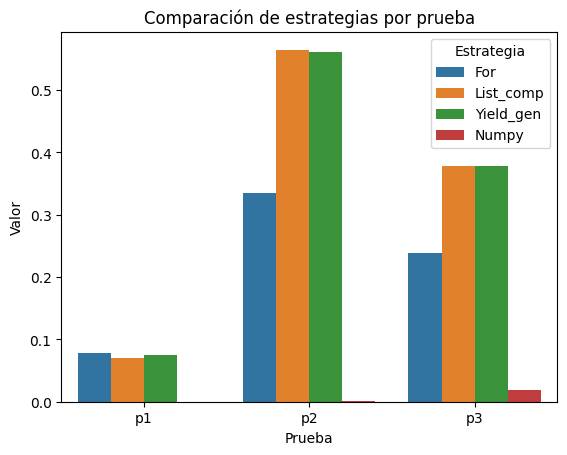

In [47]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(
    data=df_long,
    x="Prueba",
    y="Valor",
    hue="Estrategia"
)

plt.title("Comparación de estrategias por prueba")
plt.show()



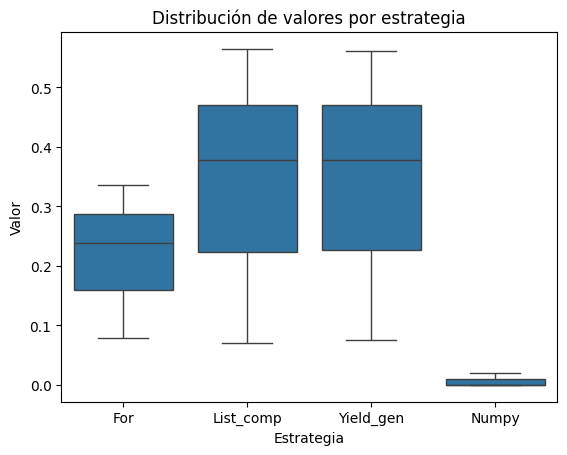

In [48]:
sns.boxplot(
    data=df_long,
    x="Estrategia",
    y="Valor"
)

plt.title("Distribución de valores por estrategia")
plt.show()


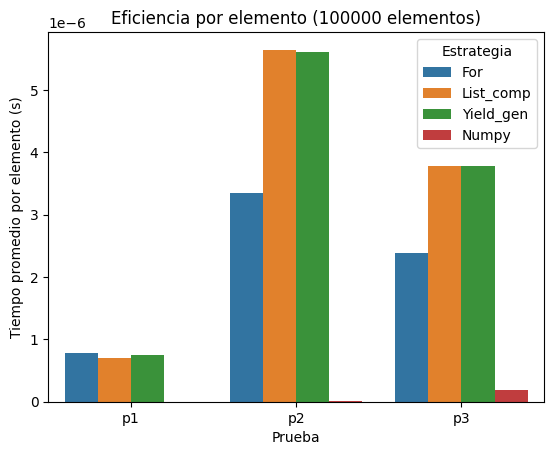

In [49]:
tabla_eff = tabla / 100000
tabla_eff
df_eff = tabla_eff.reset_index().melt(
    id_vars="Prueba",
    var_name="Estrategia",
    value_name="Tiempo_por_elemento"
)
sns.barplot(
    data=df_eff,
    x="Prueba",
    y="Tiempo_por_elemento",
    hue="Estrategia"
)

plt.title("Eficiencia por elemento (100000 elementos)")
plt.ylabel("Tiempo promedio por elemento (s)")
plt.show()

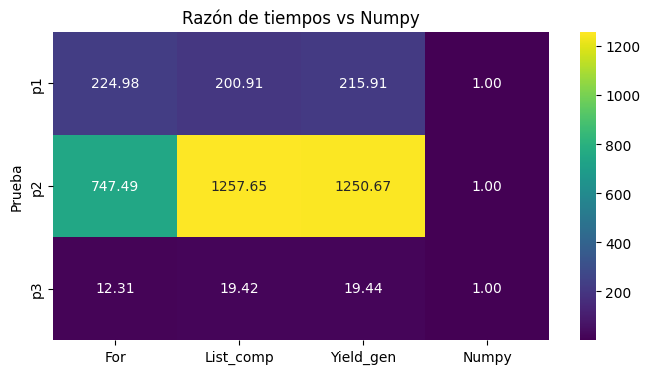

In [50]:


# tabla original con index "Prueba"
tabla  # ya la tienes

# elegimos estrategia base
base = "Numpy"

# calculamos la razón para cada estrategia vs base
razones = tabla.div(tabla[base], axis=0)

plt.figure(figsize=(8, 4))
sns.heatmap(razones, annot=True, fmt=".2f", cmap="viridis")
plt.title(f"Razón de tiempos vs {base}")
plt.show()


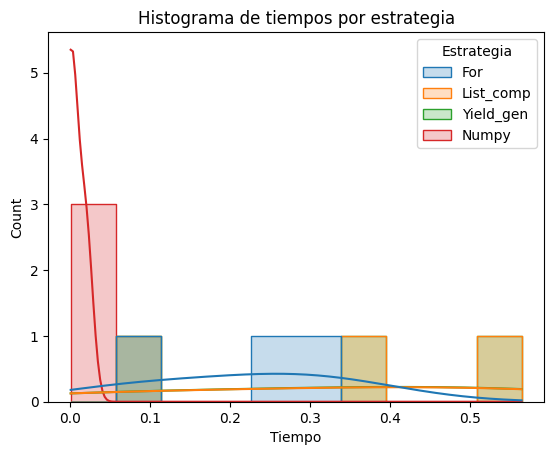

In [51]:
df_long = tabla.reset_index().melt(
    id_vars="Prueba",
    var_name="Estrategia",
    value_name="Tiempo"
)

sns.histplot(
    data=df_long,
    x="Tiempo",
    hue="Estrategia",
    bins=10,
    kde=True,
    element="step"
)

plt.title("Histograma de tiempos por estrategia")
plt.show()
